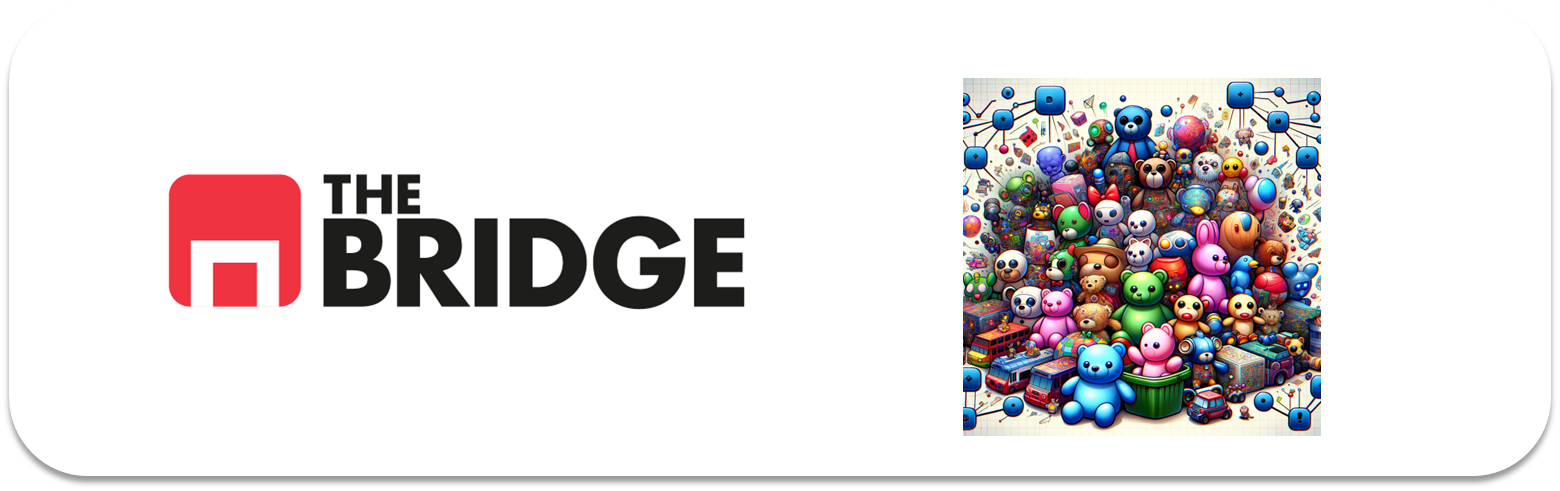

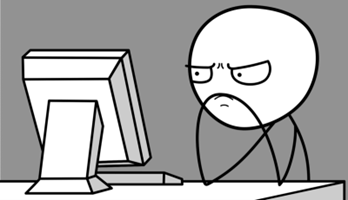

## PRACTICA OBLIGATORIA: K-MEANS

* La práctica obligatoria de esta unidad consiste en un ejercicio de modelado no supervisado sobre imágenes para practicar con el algoritmo k-means. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [94]:
import numpy as np
import pandas as pd
import seaborn as sns

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## **#1**

Vamos a trabajar con un dataset también entre los "clásicos" (aunque a veces menos conocido) que es el de rostros Olivetti. Este dataset contiene 400 imágenes en escala de grises de 64 × 64 píxeles de rostros.   


Como en otros datasets de imágenes, estás están "aplanadas" de forma que cada pixel es una feature y por cada imagen hay $64\times 64 = 4096$ features.  

Se fotografiaron 40 personas diferentes (10 veces cada una) y esas fotografías se recogen en el dataset.  

La tarea habitual es entrenar un modelo que pueda predecir qué persona está representada en cada imagen, pero nosotros lo vamos a hacer de forma no supervisada. 



### #1.1


Carga el conjunto de datos usando la función `sklearn.datasets.fetch_olivetti_faces()`. Recuerda que se carga un "diccionario". Muestra su descripción acudiendo a la clave "DESCR".

In [95]:
# Cargar el dataset
faces = fetch_olivetti_faces(shuffle=True, random_state=42)

# Extraer datos y dimensiones
X = faces.data  # Cada fila es una imagen
n_samples, n_features = X.shape

print(f"Dimensiones del dataset: {X.shape}")

Dimensiones del dataset: (400, 4096)


In [96]:
# Mostrar la descripción del conjunto de datos
print(faces.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   =====================
    Classes    

### #1.2 

Aunque no lo vas a usar hasta el final de la práctica, muestra el target. Luego cargalo todo en un mismo dataframe (tendrás que añadir el target) y obtén otro dataset con todas las imagenes reordenadas aleatoriamente (emplea por ejemplo el método `sample` del dataframe o el método que tú quieras)

In [97]:
# Mostrar target e imágenes	
X = faces.data  # Matriz con las imágenes (400, 4096)
y = faces.target  # Etiquetas (40 personas diferentes, cada una con 10 imágenes)

In [98]:
# Generar DataFrame
df_faces = pd.DataFrame(X)  # Cada columna es un píxel
df_faces["target"] = y  # Agregar la columna del target (imagen)

df_faces.head(10)

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,target
0,0.198347,0.235537,0.351240,0.409091,0.421488,0.429752,0.500000,0.528926,0.524793,0.553719,...,0.508264,0.524793,0.504132,0.483471,0.471074,0.285124,0.061983,0.128099,0.090909,20
1,0.185950,0.128099,0.115702,0.132231,0.185950,0.268595,0.433884,0.541322,0.570248,0.586777,...,0.396694,0.409091,0.301653,0.421488,0.462810,0.247934,0.190083,0.210744,0.210744,28
2,0.508264,0.603306,0.619835,0.628099,0.657025,0.665289,0.690083,0.727273,0.743802,0.768595,...,0.301653,0.305785,0.314050,0.326446,0.338843,0.330579,0.334711,0.342975,0.342975,3
3,0.136364,0.140496,0.185950,0.280992,0.318182,0.363636,0.409091,0.417355,0.438017,0.454545,...,0.169421,0.206612,0.276859,0.355372,0.685950,0.661157,0.280992,0.371901,0.276859,21
4,0.652893,0.644628,0.652893,0.706612,0.714876,0.719008,0.743802,0.747934,0.747934,0.756198,...,0.074380,0.074380,0.082645,0.082645,0.111570,0.070248,0.086777,0.185950,0.231405,9
5,0.520661,0.533058,0.541322,0.578512,0.623967,0.640496,0.648760,0.640496,0.648760,0.644628,...,0.425620,0.450413,0.400826,0.388430,0.367769,0.309917,0.371901,0.367769,0.355372,8
6,0.136364,0.119835,0.132231,0.111570,0.119835,0.123967,0.123967,0.128099,0.132231,0.144628,...,0.508264,0.619835,0.685950,0.479339,0.388430,0.533058,0.640496,0.657025,0.640496,32
7,0.247934,0.347107,0.466942,0.508264,0.574380,0.615702,0.669421,0.694215,0.710744,0.723140,...,0.070248,0.082645,0.078512,0.074380,0.082645,0.074380,0.111570,0.123967,0.119835,9
8,0.334711,0.388430,0.491736,0.623967,0.735537,0.764463,0.756198,0.764463,0.780992,0.801653,...,0.057851,0.082645,0.086777,0.078512,0.111570,0.107438,0.144628,0.161157,0.185950,26
9,0.285124,0.285124,0.272727,0.214876,0.169421,0.165289,0.264463,0.446281,0.491736,0.541322,...,0.342975,0.326446,0.322314,0.301653,0.289256,0.305785,0.301653,0.309917,0.314050,12


In [99]:
# Reordenar aleatoriamente las filas
df_faces_shuffled = df_faces.sample(frac=1, random_state=42).reset_index(drop=True)

# Mostramos el DataFrame reordenado
print("\nDespués de reordenar aleatoriamente las imágenes:")
print(df_faces_shuffled.head())



Después de reordenar aleatoriamente las imágenes:
          0         1         2         3         4         5         6  \
0  0.252066  0.231405  0.276859  0.417355  0.433884  0.669421  0.834711   
1  0.500000  0.545455  0.582645  0.623967  0.648760  0.690083  0.694215   
2  0.723140  0.710744  0.714876  0.731405  0.735537  0.752066  0.772727   
3  0.652893  0.690083  0.677686  0.690083  0.714876  0.743802  0.747934   
4  0.409091  0.590909  0.657025  0.681818  0.694215  0.731405  0.760331   

          7         8         9  ...      4087      4088      4089      4090  \
0  0.859504  0.871901  0.871901  ...  0.508264  0.268595  0.140496  0.165289   
1  0.714876  0.723140  0.731405  ...  0.161157  0.177686  0.173554  0.177686   
2  0.793388  0.814050  0.834711  ...  0.904959  0.549587  0.409091  0.491736   
3  0.735537  0.710744  0.681818  ...  0.152893  0.140496  0.086777  0.111570   
4  0.785124  0.776860  0.785124  ...  0.276859  0.314050  0.268595  0.247934   

       4091      

### #1.3

Vamos a dividir en train y test, pero OJO RECUERDA QUE EN LOS PROBLEMAS NO SUPERVISADOS NO HAY SPLIT (porque no hay target), aquí lo hacemos para poder comparar posteriormente el clustering con la clasificación (ya que es una práctica formativa).

Por tanto, divídelo en un conjunto de entrenamiento, un conjunto de validación y un conjunto de pruebas (80-10-10). Dado que el conjunto de datos es bastante pequeño, emplea un muestreo estratificado para asegurarse de que haya el mismo número de imágenes por persona en cada conjunto (estratificando por la columna que contenga el target)

NOTA: No hemos hecho hasta ahora la separación en tres sets, investiga por tu cuenta o bien haz primero un split 90-10 y luego otro split 89-11 sobre el de 80 (para que de los números aproximados), por ejemplo.

In [100]:
# División inicial en 90% Train + Validación y 10% Test
X_train_valid, X_test, y_train_valid, y_test = train_test_split(
    X, y, test_size=0.10, random_state=42, stratify=y  # Estratificación por persona
)

# Verificar la cantidad de datos en cada conjunto
print(f"Tamaño de Train + Validación: {len(X_train_valid)}")
print(f"Tamaño de Test: {len(X_test)}")


Tamaño de Train + Validación: 360
Tamaño de Test: 40


In [101]:
# Ahora dividimos Train + Validación en Train (80%) y Validación (10%)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_valid, y_train_valid, test_size=0.11, random_state=42, stratify=y_train_valid
)  # 11% porque equivale a 10% del total original

# Verificar tamaños finales
print(f"Tamaño de Train: {len(X_train)}")
print(f"Tamaño de Validación: {len(X_valid)}")
print(f"Tamaño de Test: {len(X_test)}")


Tamaño de Train: 320
Tamaño de Validación: 40
Tamaño de Test: 40


### #1.4

Crea los pares X,y para train, validation y test.

In [102]:
train_set = (X_train, y_train)
valid_set = (X_valid, y_valid)
test_set = (X_test, y_test)

# Verificación de los datos
print("Conjuntos de datos creados:")
print(f"\tTrain set: {len(train_set[0])} imágenes")
print(f"\tValidation set: {len(valid_set[0])} imágenes")
print(f"\tTest set: {len(test_set[0])} imágenes")


Conjuntos de datos creados:
	Train set: 320 imágenes
	Validation set: 40 imágenes
	Test set: 40 imágenes


Utiliza la siguiente función para visualizar alguna de las caras (observa que tienes que dar la X y la y, usa iloc en ambos datasets)

In [103]:
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

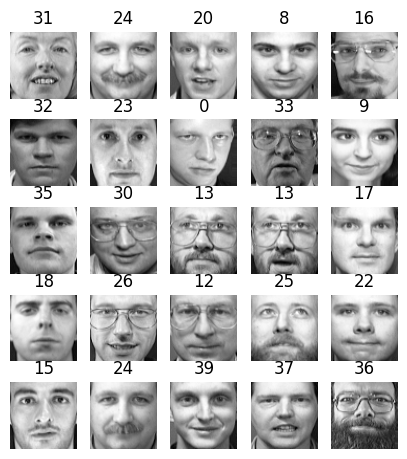

In [104]:
plot_faces(X_train[:25], y_train[:25], n_cols=5)

### #1.5

Para acelerar las cosas, reduciremos la dimensionalidad de los datos utilizando PCA (técnica que veremos en el siguiente sprint). Modifica la siguiente celda de forma que las X se correspondan con las que has utilizado en el ejercicio anterior.

In [105]:
from sklearn.decomposition import PCA

pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)

pca.n_components_

221

### 1.6

Aquí viene la parte del león. A continuación, agrupa las imágenes utilizando K-Means sobre el dataset de train reducido en el ejercicio anterior. Emplea el método del máximo de score de silueta para obtener el mejor k, probando con K de 5 en 5 hasta 150. ¿Cuál es el k que proporciona el mejor score de silueta? NOTA: Emplea todas las features (no hace falta seleccionar, y ya están escaladas entre 0 y 1)

K=5, Silhouette Score=0.1085
K=10, Silhouette Score=0.0935
K=15, Silhouette Score=0.1021
K=20, Silhouette Score=0.1016
K=25, Silhouette Score=0.1272
K=30, Silhouette Score=0.1347
K=35, Silhouette Score=0.1362
K=40, Silhouette Score=0.1425
K=45, Silhouette Score=0.1611
K=50, Silhouette Score=0.1559
K=55, Silhouette Score=0.1732
K=60, Silhouette Score=0.1728
K=65, Silhouette Score=0.1726
K=70, Silhouette Score=0.1714
K=75, Silhouette Score=0.1879
K=80, Silhouette Score=0.1883
K=85, Silhouette Score=0.1904
K=90, Silhouette Score=0.1917
K=95, Silhouette Score=0.1838
K=100, Silhouette Score=0.1859
K=105, Silhouette Score=0.1929
K=110, Silhouette Score=0.1881
K=115, Silhouette Score=0.1875
K=120, Silhouette Score=0.1861
K=125, Silhouette Score=0.1836
K=130, Silhouette Score=0.1838
K=135, Silhouette Score=0.1906
K=140, Silhouette Score=0.1840
K=145, Silhouette Score=0.1842
K=150, Silhouette Score=0.1887

El mejor K es 105 con un coeficiente de silueta de 0.1929


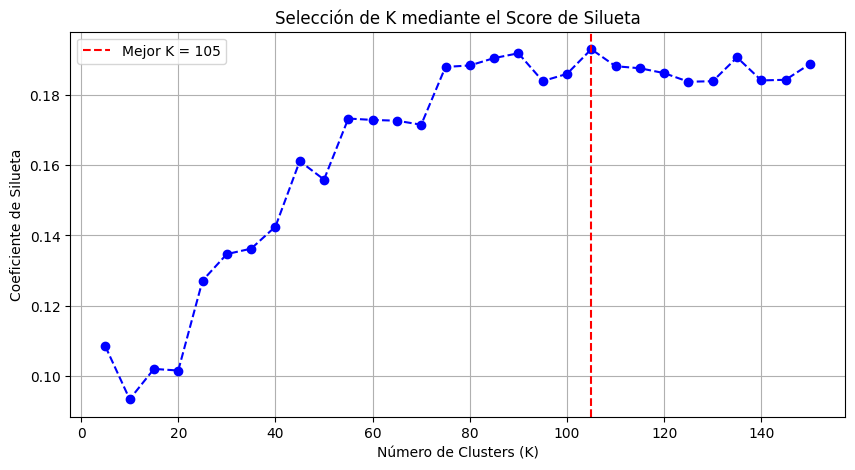

In [106]:
from sklearn.metrics import silhouette_score

# Lista para almacenar los scores de silueta
silhouette_scores = []
k_valores = list(range(5, 151, 5))  # Probar K desde 5 hasta 150 en pasos de 5

# Iterar sobre los valores de K y calcular el coeficiente de silueta
for k in k_valores:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_train_pca)
    score = silhouette_score(X_train, labels)
    silhouette_scores.append(score)
    print(f"K={k}, Silhouette Score={score:.4f}")

# Encontrar el mejor K
best_k = k_valores[np.argmax(silhouette_scores)]
best_score = max(silhouette_scores)

print(f"\nEl mejor K es {best_k} con un coeficiente de silueta de {best_score:.4f}")

# Graficar el coeficiente de silueta para cada K
plt.figure(figsize=(10, 5))
plt.plot(k_valores, silhouette_scores, marker="o", linestyle="--", color="b")
plt.xlabel("Número de Clusters (K)")
plt.ylabel("Coeficiente de Silueta")
plt.title("Selección de K mediante el Score de Silueta")
plt.axvline(best_k, color='red', linestyle="--", label=f"Mejor K = {best_k}")
plt.legend()
plt.grid()
plt.show()



### #1.7

Repite el ejercio anterior empleando ahora el método del codo de Inercia. ¿Sale algo más concluyente o que refuerce el anterior resultado?

K=5, Inertia=17068.71
K=10, Inertia=14837.76
K=15, Inertia=13424.27
K=20, Inertia=12345.14
K=25, Inertia=11173.90
K=30, Inertia=10410.72
K=35, Inertia=9817.62
K=40, Inertia=9170.18
K=45, Inertia=8531.22
K=50, Inertia=8066.64
K=55, Inertia=7523.53
K=60, Inertia=7163.24
K=65, Inertia=6803.41
K=70, Inertia=6430.97
K=75, Inertia=6042.48
K=80, Inertia=5781.60
K=85, Inertia=5489.11
K=90, Inertia=5220.77
K=95, Inertia=4978.06
K=100, Inertia=4740.62
K=105, Inertia=4483.94
K=110, Inertia=4287.71
K=115, Inertia=4107.65
K=120, Inertia=3805.54
K=125, Inertia=3639.77
K=130, Inertia=3490.70
K=135, Inertia=3281.52
K=140, Inertia=3095.08
K=145, Inertia=2933.62
K=150, Inertia=2731.73


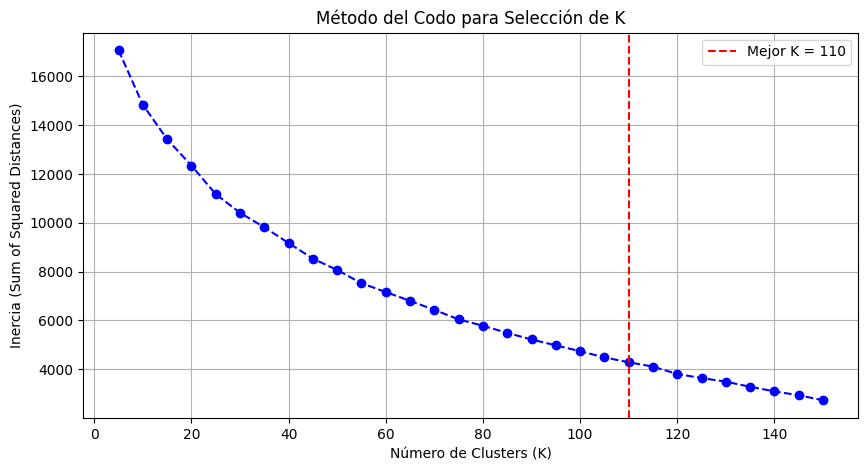


El mejor K según el método del codo es 110


In [107]:
# Lista para almacenar las inercias (sum of squared distances)
inertia_scores = []
k_values = list(range(5, 151, 5))  # Probar K desde 5 hasta 150 en pasos de 5

# Iterar sobre los valores de K y calcular la inercia
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_train_pca)
    inertia_scores.append(kmeans.inertia_)
    print(f"K={k}, Inertia={kmeans.inertia_:.2f}")

# Graficar el método del codo
plt.figure(figsize=(10, 5))
plt.plot(k_values, inertia_scores, marker="o", linestyle="--", color="b")
plt.xlabel("Número de Clusters (K)")
plt.ylabel("Inercia (Sum of Squared Distances)")
plt.title("Método del Codo para Selección de K")
plt.grid()

# Identificar el punto del codo usando la diferencia de pendientes
curvatures = np.diff(inertia_scores, 2)  # Segunda derivada aproximada
best_k = k_values[np.argmin(curvatures)]  # K donde la curva empieza a aplanarse
plt.axvline(best_k, color='red', linestyle="--", label=f"Mejor K = {best_k}")
plt.legend()
plt.show()

print(f"\nEl mejor K según el método del codo es {best_k}")


### #1.8

Quédate con el k obtenido con el método del score de silueta y asigna el modelo con ese k a una variable `best_model`

In [108]:
# Definir el mejor número de clusters obtenido con el score de silueta
best_k = 105

# Entrenar el modelo K-Means con el mejor número de clusters
best_model = KMeans(n_clusters=best_k, random_state=42, n_init=10)
best_model.fit(X_train_pca)  # Ajustamos el modelo con los datos de entrenamiento

# Mostrar resultados
print(f"Modelo K-Means entrenado con K = {best_k}")
print(f"Inercia final del modelo: {best_model.inertia_:.2f}")
print(f"Etiquetas asignadas: {np.unique(best_model.labels_)}")


Modelo K-Means entrenado con K = 105
Inercia final del modelo: 4483.94
Etiquetas asignadas: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104]


### #1.9

Haz una valoración del método de clustering para el K elegido. Para ello crea un programa que recorra la lista de etiquetas dadas por "best_model" y que, haciendo uso de la función que ya te hemos proporcionado, pinte las caras asignadas a los 10 primeros clústeres. Ojo tendrás que hacer una pequeña adaptación porque las features de entrenamiento no son las features reales (son una "transformación" de estas) y si pasas el X de entrenamiento no verás nada. ¿Ves caras similares?

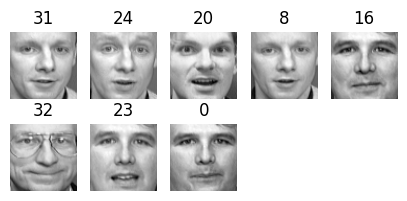

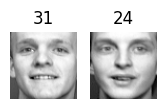

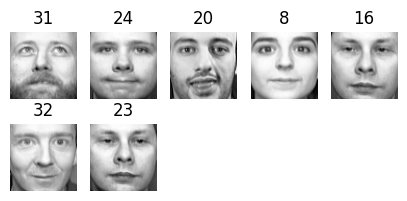

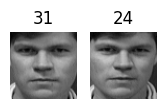

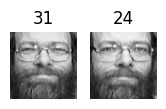

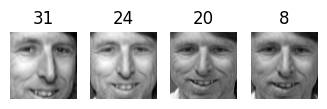

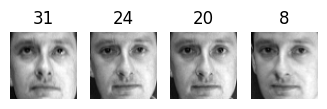

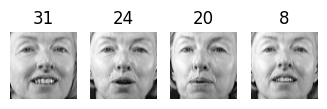

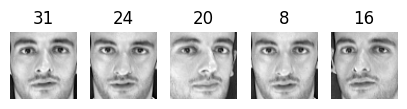

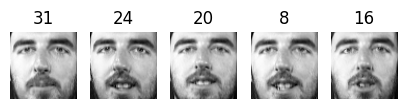

<Figure size 640x480 with 0 Axes>

In [109]:
# Definir el número de clusters a visualizar
num_clusters = 10

# Obtener etiquetas asignadas por K-Means
cluster_labels = best_model.labels_

for cluster in range(num_clusters):
    cluster_indices = np.where(cluster_labels == cluster)[0]  # Índices de imágenes en este clúster
    imagenes_seleccionadas = X_train[cluster_indices[:10]]  # Tomamos 10 imágenes del cluster
    plot_faces(imagenes_seleccionadas, y_train[:10], n_cols=5)

plt.suptitle("Visualización de Rostros por Clúster", fontsize=14)
plt.tight_layout()
plt.show()


## **#2**


### #2.1


Continuando con el conjunto de datos de caras Olivetti, entrena un clasificador para predecir qué persona está representada en cada imagen, y evalúalo en el conjunto de validación. Utiliza un RandomForest con 150 submodelos o estimadores (y el resto de hiperparámetros déjalos a su valor por defecto)

Precisión del modelo en validación: 1.0000

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1
          1

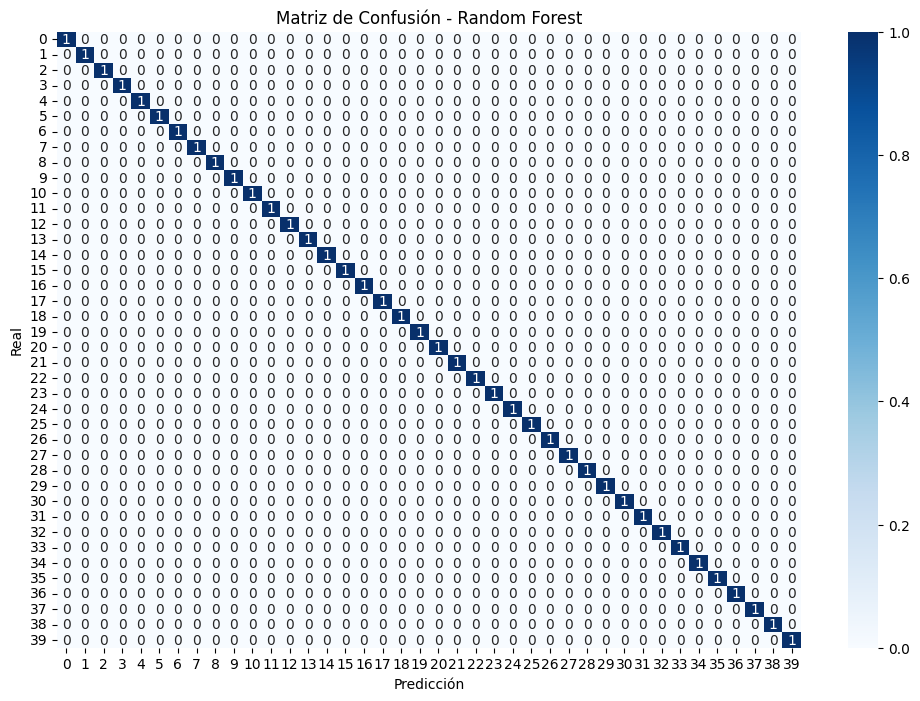

In [110]:
# 1. Crear el modelo Random Forest con 150 estimadores
rf_model = RandomForestClassifier(n_estimators=150, random_state=42)

# 2. Entrenar el modelo con los datos de entrenamiento
rf_model.fit(X_train_pca, y_train)

# 3. Hacer predicciones sobre el conjunto de validación
y_pred = rf_model.predict(X_valid_pca)

# 4. Evaluar el modelo con métricas de clasificación
accuracy = accuracy_score(y_valid, y_pred)
print(f"Precisión del modelo en validación: {accuracy:.4f}")

# 5. Mostrar reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_valid, y_pred, zero_division=1))

# 6. Matriz de confusión
conf_matrix = confusion_matrix(y_valid, y_pred)

# 7. Visualizar la matriz de confusión con Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_valid), yticklabels=set(y_valid))
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Random Forest")
plt.show()


### #2.2

Utiliza K-Means como una herramienta de reducción de dimensionalidad y entrena un clasificador en el conjunto reducido. Para ello emplea el método transform de manera que ahora las features de entrada sean las distancias de cada punto a los centroides del modelo "best_model" de la parte anterior. Por ejemplo:
```python
X_train_reduced = best_model.transform(X_train_pca) 
```


Ojo lo tienes que aplicar a todos los datasets. Luego vuelve a entrenar un RandomForest sobre este dataset y evalualo contra el dataset de validacion.

In [111]:
# 1 Transformar los datos de entrenamiento, validación y prueba con K-Means
X_train_reduced = best_model.transform(X_train_pca)
X_val_reduced = best_model.transform(X_valid_pca)
X_test_reduced = best_model.transform(X_test_pca)

# 2️ Entrenar un clasificador en el espacio reducido
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_reduced, y_train)

# 3️ Evaluar el modelo en validación
y_val_pred = clf.predict(X_val_reduced)
accuracy_val = accuracy_score(y_valid, y_val_pred)
print(f"Precisión en Validación: {accuracy_val:.4f}")

# 4️ Evaluar el modelo en el conjunto de test
y_test_pred = clf.predict(X_test_reduced)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Precisión en Test: {accuracy_test:.4f}")

# 5 Reporte de Clasificación
print("\nReporte de Clasificación (Validación):")
print(classification_report(y_valid, y_val_pred, zero_division=1))

print("\nReporte de Clasificación (Test):")
print(classification_report(y_test, y_test_pred, zero_division=1))


Precisión en Validación: 0.9000
Precisión en Test: 0.8500

Reporte de Clasificación (Validación):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      0.00      0.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       0.50      1.00      0.67         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       0.50      1.00      0.67         1
          15       1.00      1.00    

### #2.3 EXTRA VOLUNTARIO

Busca el número de clusters k que generen un algoritmo kmeans que a su vez sus distancias a los centroides sean las features de un clasificador RandomForest y que permita al clasificador obtener el mejor rendimiento: ¿Qué rendimiento puedes alcanzar? (en terminos de Accuracy)

In [112]:
# Rango de valores de k
k_values = range(5, 150, 5)
best_k = None
best_accuracy = 0
accuracies = {}

# Iterar sobre distintos valores de k
for k in k_values:
    print(f"Probando k = {k}...", end=" ")

    # Entrenar K-Means con k clusters
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
    kmeans.fit(X_train_pca)  # Usamos los datos reducidos

    # Transformar los datos en distancias a los centroides
    X_train_reduced = kmeans.transform(X_train_pca)
    X_val_reduced = kmeans.transform(X_valid_pca)
    X_test_reduced = kmeans.transform(X_test_pca)

    # Entrenar RandomForest con las features de K-Means
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train_reduced, y_train)

    # Evaluar en validación
    y_val_pred = clf.predict(X_val_reduced)
    accuracy_val = accuracy_score(y_valid, y_val_pred)

    # Guardar el mejor k
    accuracies[k] = accuracy_val
    if accuracy_val > best_accuracy:
        best_accuracy = accuracy_val
        best_k = k
        best_model = clf  # Guardamos el mejor clasificador
        best_kmeans = kmeans  # Guardamos el mejor modelo K-Means

    print(f"Accuracy: {accuracy_val:.4f}")

# Mejor k encontrado
print(f"\nMejor k encontrado: {best_k} con Accuracy en Validación: {best_accuracy:.4f}")

# Evaluar en test con el mejor modelo
X_test_reduced = best_kmeans.transform(X_test_pca)
y_test_pred = best_model.predict(X_test_reduced)
accuracy_test = accuracy_score(y_test, y_test_pred)

print(f"\nAccuracy Final en Test con k = {best_k}: {accuracy_test:.4f}")


Probando k = 5... Accuracy: 0.5250
Probando k = 10... Accuracy: 0.5000
Probando k = 15... Accuracy: 0.7250
Probando k = 20... Accuracy: 0.7500
Probando k = 25... Accuracy: 0.7750
Probando k = 30... Accuracy: 0.7250
Probando k = 35... Accuracy: 0.7250
Probando k = 40... Accuracy: 0.8000
Probando k = 45... Accuracy: 0.7250
Probando k = 50... Accuracy: 0.9000
Probando k = 55... Accuracy: 0.8250
Probando k = 60... Accuracy: 0.9000
Probando k = 65... Accuracy: 0.8000
Probando k = 70... Accuracy: 0.8750
Probando k = 75... Accuracy: 0.8500
Probando k = 80... Accuracy: 0.8750
Probando k = 85... Accuracy: 0.9250
Probando k = 90... Accuracy: 0.9250
Probando k = 95... Accuracy: 0.9250
Probando k = 100... Accuracy: 0.9250
Probando k = 105... Accuracy: 0.9000
Probando k = 110... Accuracy: 0.9250
Probando k = 115... Accuracy: 0.9000
Probando k = 120... Accuracy: 0.9250
Probando k = 125... Accuracy: 0.9250
Probando k = 130... Accuracy: 0.9250
Probando k = 135... Accuracy: 0.9250
Probando k = 140... A